# Exploratory Data Analysis - Spotify Top 200 Charts (2020-2021)


The dataset I have used for EDA contains the **Top 200 Weekly (Global) charts of Spotify in 2020 & 2021**. The chart is made by Spotify and is updated regularly, so our  dataset doesn't include just 200 songs but 1556 songs that made it to Top 200 charts during 2020-21 even if it was just for a single day.

The dataset include the following features:

**Highest Charting Position:** The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Number of Times Charted:** The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Week of Highest Charting:** The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Song Name:** Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Song iD:** The song ID provided by Spotify (unique to each song).

**Streams:** Approximate number of streams the song has.

**Artist:** The main artist/ artists involved in making the song.

**Artist Followers:** The number of followers the main artist has on Spotify.

**Genre:** The genres the song belongs to.

**Release Date:** The initial date that the song was released.

**Weeks Charted:** The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Popularity:** The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Acousticness:** A measure from 0.0 to 1.0 of whether the track is acoustic.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**Instrumentalness:** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Chord:** The main chord of the song instrumental.

## Downloading the Dataset

We will be downloading the data set using **opendatasets**. It is a Python library for downloading datasets from Kaggle, Google Drive, and other online sources. The dataset we are using has CSV format.

In [5]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [6]:
# URL where the data set is present
dataset_url = 'https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021' 

In [7]:
# downloading dataset using opendatasets
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushkr07
Your Kaggle Key: ········


100%|██████████| 165k/165k [00:00<00:00, 63.4MB/s]

The dataset has been downloaded and extracted.

In [8]:
# storing location of dataset to point it for our analysis
data_dir = './spotify-top-200-charts-20202021'

In [9]:
import os
os.listdir(data_dir)

['spotify_dataset.csv']

In [10]:
project_name = "spotify-top-200-chart-eda"

## Data Preparation and Cleaning

In this process we will clean the dataset that we have and make it usable for us, it’s crucial for removing faulty data and filling in gaps. Important tasks here include:

 - Removing extraneous data and outliers.
 - Filling in missing values.
 - Conforming data to a standardized pattern.
 - Masking private or sensitive data entries.


In [11]:
import pandas as pd
import numpy as np

In [12]:
# saving data in our dataset as pandas dataframe
spotify_raw_df = pd.read_csv(data_dir + '/spotify_dataset.csv')

In [13]:
spotify_raw_df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [14]:
spotify_raw_df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [15]:
pd.isnull(spotify_raw_df).sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

Here we have just checked the count of null value in each column of our dataset, and from the output we can see there isn't any null value.


In [16]:
spotify_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

From the output here we can see that we have 1556 non-null value in each of our columns in the dataset, but the **Dtype** i.e data-type of some of the fields like Popularity, Energy, Loudnesss, Tempo e.t.c is **object** rather than float or int that we can see in the data itself.

**From this we percive there's something wrong with our data.**

In [17]:
for col in spotify_raw_df.columns:
    # check if the columns contains string data
    if pd.api.types.is_string_dtype(spotify_raw_df[col]):
        spotify_raw_df[col] = spotify_raw_df[col].str.strip()
spotify_raw_df = spotify_raw_df.replace({"":np.nan})

After checking the data again more thoroughly I found that in some of the rows instead of the Null value for data not available, we had an string with just a space. The string with just space value isn't considered as NULL value, that's why all our column showed to have no null value.

The above cell finds the strings with only space value in the dataframe and replaces it with NULL value.

In [18]:
spotify_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Song ID                    1545 non-null   object
 9   Genre                      1545 non-null   object
 10  Release Date               1545 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1545 non-null   object
 13  Danceability               1545 non-null   object
 14  Energy  

Now we can see that we have 11 rows that has null value in it. We now need to get rid of this problem in the data. So, I tried searching the data that isn't available in the dataset but was unable to find it and we can't other techniques to remove NULL values as all songs will have very differnt values for different categories.

That's why we will be dropping the rows with null values.

In [19]:
spotify_raw_df = spotify_raw_df.dropna()

In [20]:
spotify_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1545 non-null   int64 
 1   Highest Charting Position  1545 non-null   int64 
 2   Number of Times Charted    1545 non-null   int64 
 3   Week of Highest Charting   1545 non-null   object
 4   Song Name                  1545 non-null   object
 5   Streams                    1545 non-null   object
 6   Artist                     1545 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Song ID                    1545 non-null   object
 9   Genre                      1545 non-null   object
 10  Release Date               1545 non-null   object
 11  Weeks Charted              1545 non-null   object
 12  Popularity                 1545 non-null   object
 13  Danceability               1545 non-null   object
 14  Energy  

We have now got rid of the NULL values but the dtype still shows to be object so I am explicitly changing the values to what I see fit.

In [21]:
spotify_raw_df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']] = spotify_raw_df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']].astype(float)

In [22]:
spotify_raw_df[['Artist Followers', 'Popularity', 'Duration (ms)']] = spotify_raw_df[['Artist Followers', 'Popularity', 'Duration (ms)']].apply(pd.to_numeric)

In [23]:
spotify_raw_df['Streams'] = spotify_raw_df['Streams'].str.replace(',', '').apply(pd.to_numeric)

For streams I got an issue in the dataframe that the numbers were represented with commas in it i.e '7,234,437' format and I can't use it for any numberic operation or plotting. So, the commas were removed and then it's data type was changed.

In [24]:
spotify_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Streams                    1545 non-null   int64  
 6   Artist                     1545 non-null   object 
 7   Artist Followers           1545 non-null   int64  
 8   Song ID                    1545 non-null   object 
 9   Genre                      1545 non-null   object 
 10  Release Date               1545 non-null   object 
 11  Weeks Charted              1545 non-null   object 
 12  Popularity                 1545 non-null   int64  
 13  Danceability               1545 non-null   float

Now all the data is clean and we are ready to do our analysis

## Exploratory Analysis and Visualization

We will now do some Data Visualiztion and try to get some insight through it.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (17, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here we are considering only the top 200 most popular song in our dataset because plotting all 1545 songs will not give us clear insight as detail on them might vary but top 200 songs can show us better pattern in what makes a song go top of the charts.

In [26]:
spotify_top_200 = spotify_raw_df.head(200)

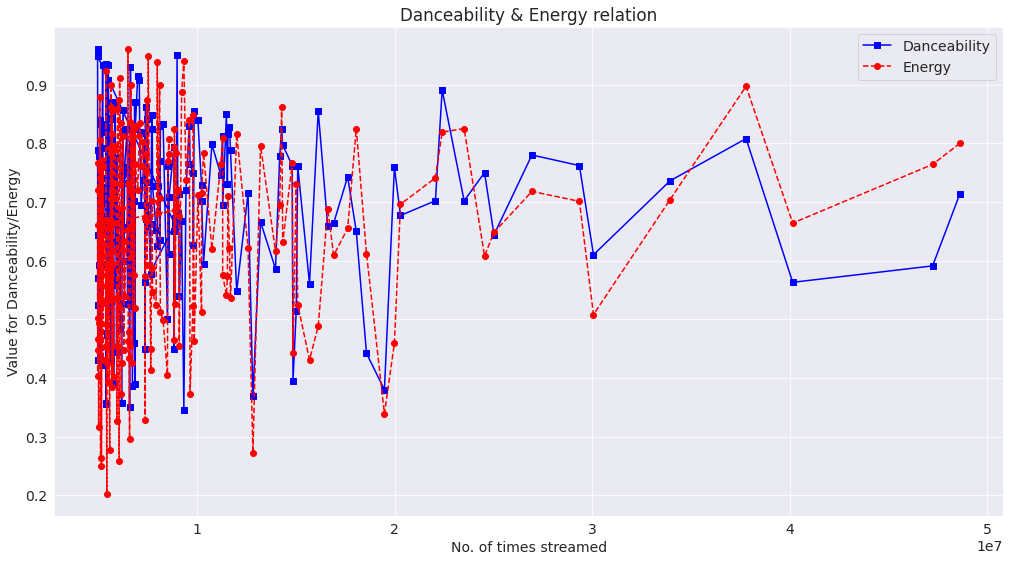

In [27]:
plt.plot(spotify_top_200.Streams, spotify_top_200.Danceability, 's-b')
plt.plot(spotify_top_200.Streams, spotify_top_200.Energy, 'o--r')

plt.xlabel('No. of times streamed')
plt.ylabel('Value for Danceability/Energy');

plt.title("Danceability & Energy relation")
plt.legend(['Danceability', 'Energy']);

Here I have tried to see a relation between Danceability and Energy of a song and how much it gets streamed.

From the graph we can see that the **Danceability and Energy of the most stream songs is above 0.5** and this goes for the top 13 most streamed song and only when we come the 14th song that we see a low Danceability and Energy. 

So, the more Danceable and Energy invoking the song is, higher are the chances of it getting stramed a lot.

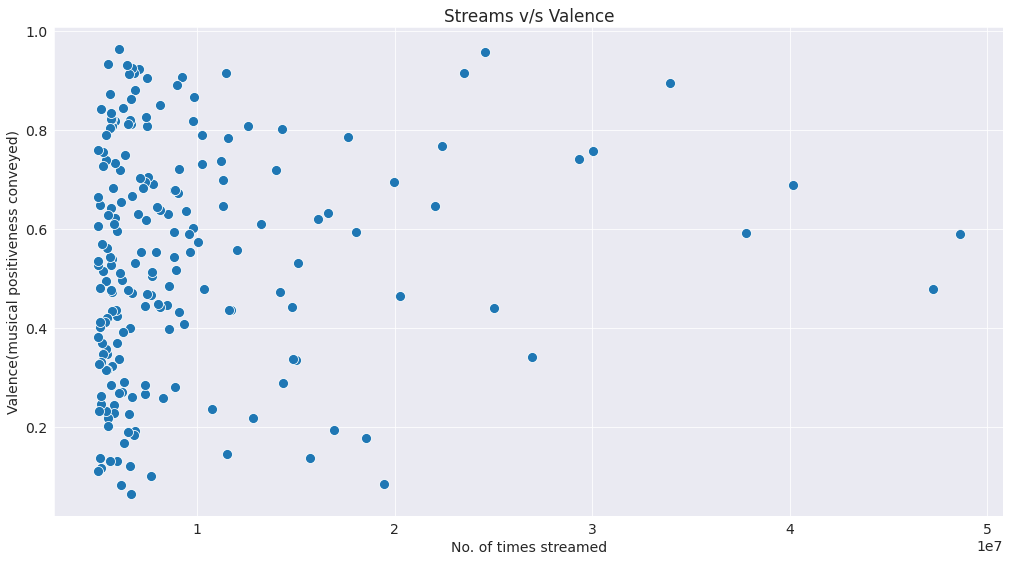

In [28]:
sns.scatterplot(x=spotify_top_200.Streams, 
                y=spotify_top_200.Valence, 
                s=100);

plt.xlabel('No. of times streamed')
plt.ylabel('Valence(musical positiveness conveyed)');
plt.title("Streams v/s Valence");

Again here we can see that in the songs that got streamed the most does have higher valance, especially for songs that have been streamed more than 20M times. While for songs streamed less than 10M times the value for valance is evenly distributed.

Text(0, 0.5, 'Speechiness')

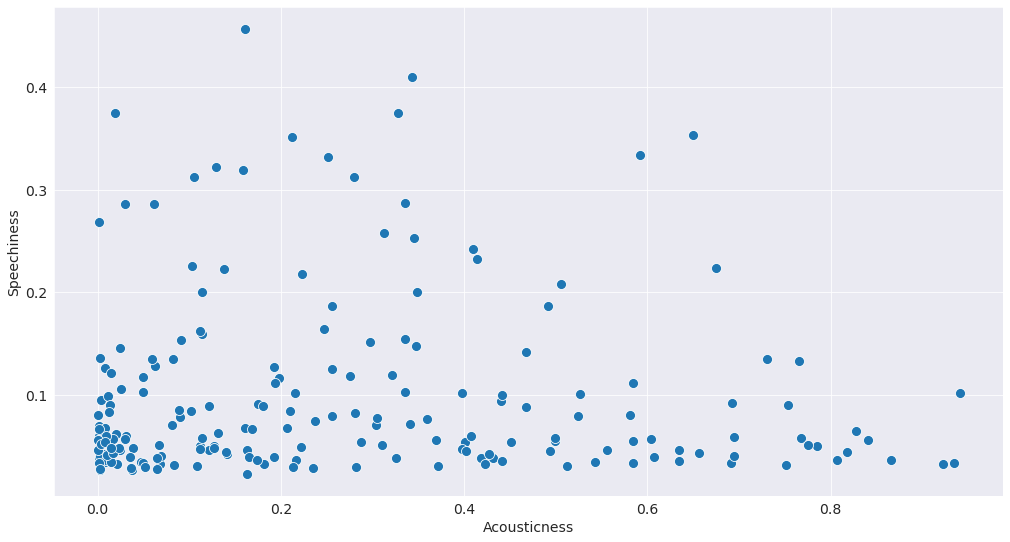

In [29]:
sns.scatterplot(x=spotify_top_200.Acousticness, 
                y=spotify_top_200.Speechiness, 
                s=100);

plt.xlabel('Acousticness')
plt.ylabel('Speechiness')

In this graph we can see that almost all the song has less score on speechiness and the acousticness is evenly distributed apart for the cluster of songs that we see at left bottom of the graph. We can understand from this grpah that songs generally has more acousticness in it than speechiness. 

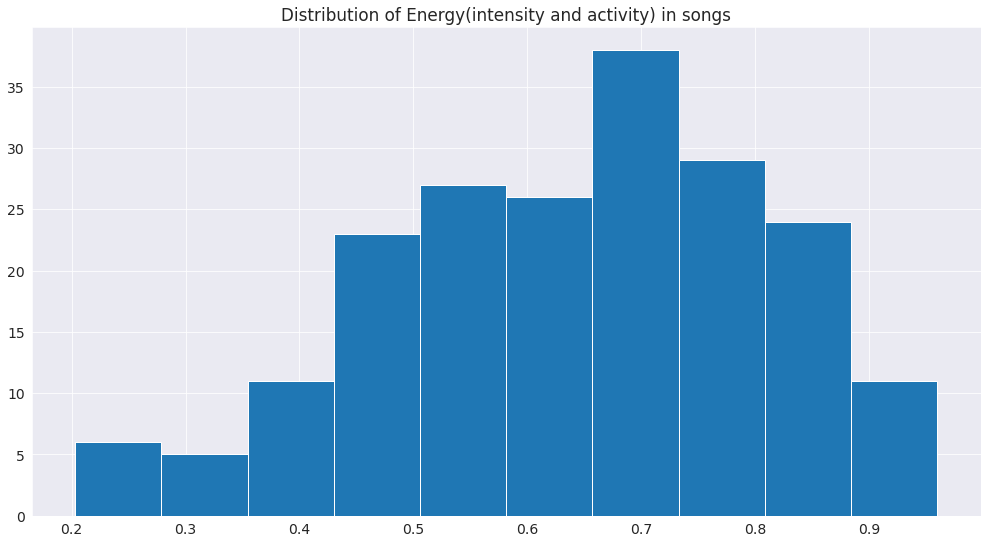

In [30]:
plt.title("Distribution of Energy(intensity and activity) in songs")
plt.hist(spotify_top_200.Energy);

Here from this grpah we can take note that 152 of the top 200 songs scores 0.5 or higher score at Energy.

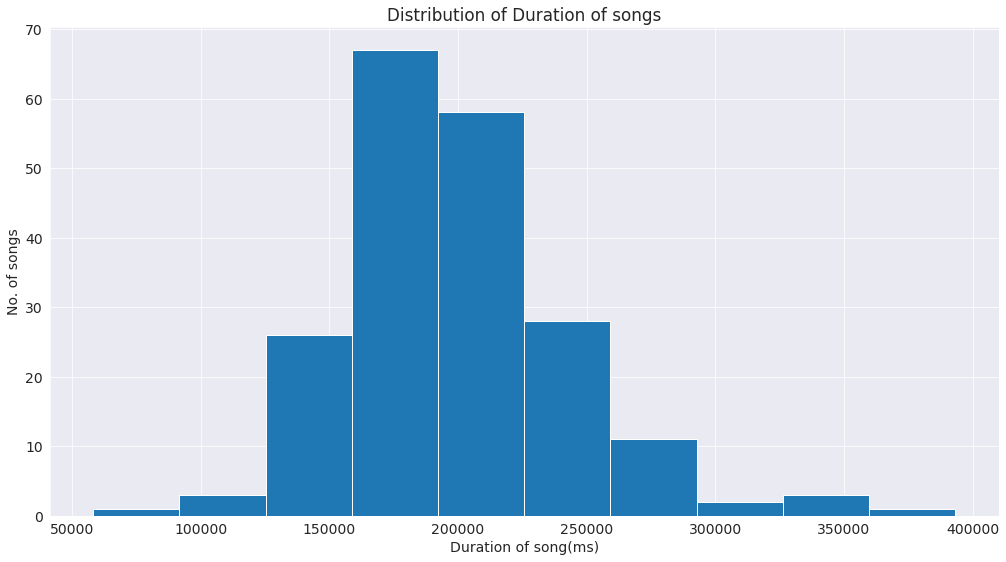

In [31]:
plt.hist(spotify_top_200["Duration (ms)"]);

plt.xlabel("Duration of song(ms)")
plt.ylabel("No. of songs")
plt.title("Distribution of Duration of songs");

Here I have tried to check what is durtion of most of the songs in top 200 of our dataset, we can see that most songs are between 160 secs to 225 secs long. 

## Asking and Answering Questions

Let's see more of statistical inference that we can make from the data and this time I am switching between the top 200 popular songs and whole dataset to get better result.


#### Q1: Which artis had most song feature in the top 200 chart throught the duration of our data?

In [34]:
artists_top200_count = spotify_raw_df['Artist'].value_counts()

In [35]:
artists_top200_count

Taylor Swift                     52
Justin Bieber                    32
Lil Uzi Vert                     32
Juice WRLD                       30
Pop Smoke                        29
                                 ..
NF, Hopsin                        1
Madame                            1
Francesca Michielin, Fedez        1
Booba, JSX                        1
Dadá Boladão, Tati Zaqui, OIK     1
Name: Artist, Length: 712, dtype: int64

#### Q2: How no. of times streamed and popularity of a song varies in ou dataset?

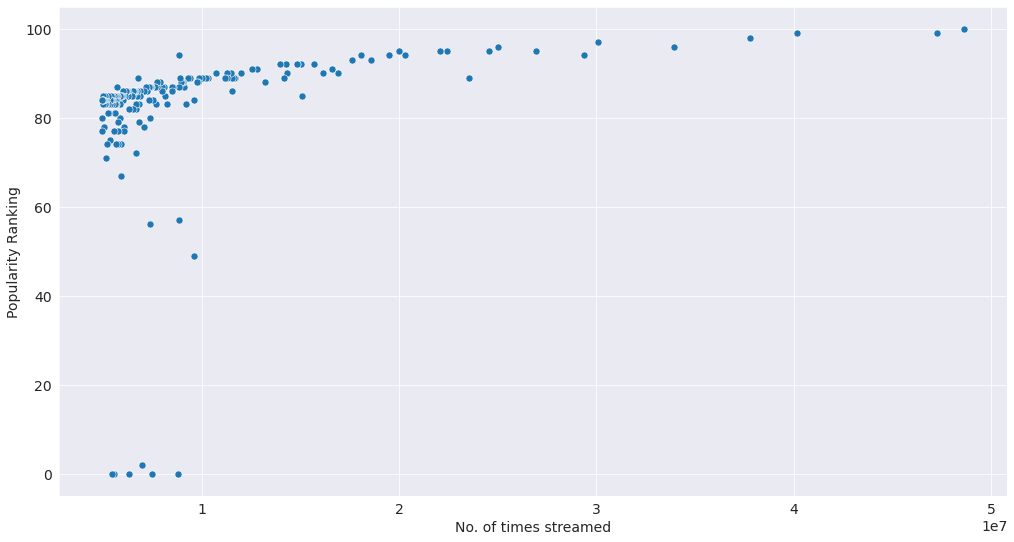

In [36]:
sns.scatterplot(x=spotify_top_200.Streams, y=spotify_top_200.Popularity, s=50)

plt.xlabel('No. of times streamed')
plt.ylabel('Popularity Ranking');

The above graph shows us the popularity v/s stream graph. We can a cluster of songs that has below 10M stream and above rank above 60 in the popularity, while we also have few songs that score low on both popularity and ranking.

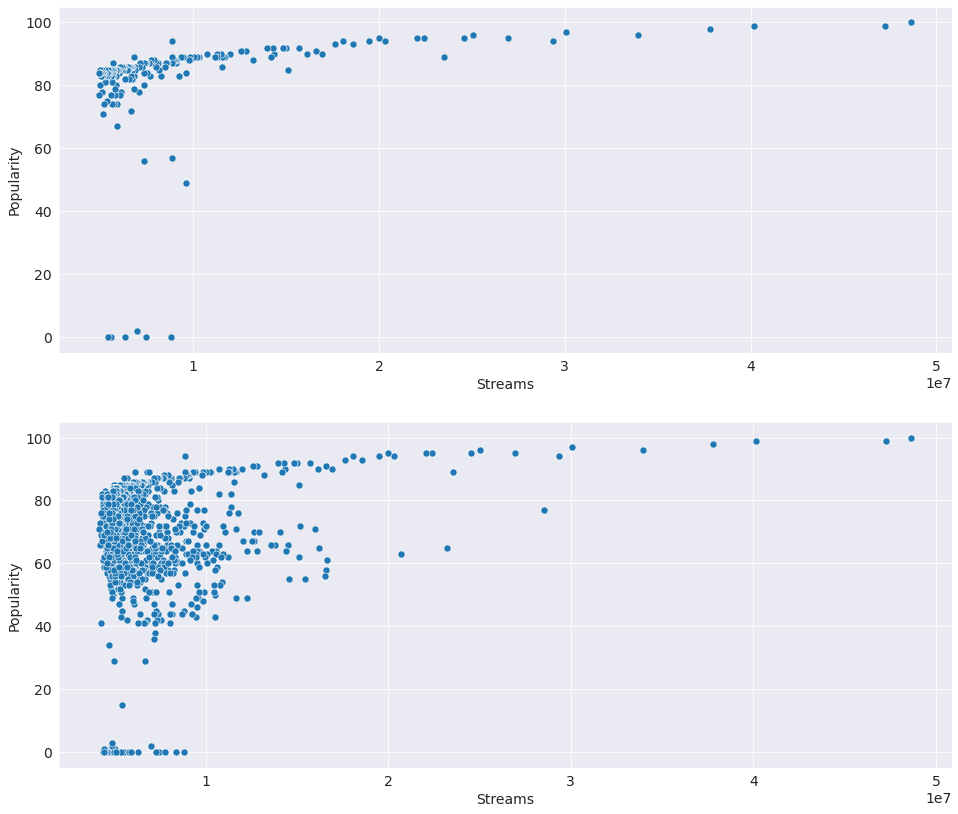

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# popularity v/s streams of top 200 popular songs 
sns.scatterplot(x=spotify_top_200.Streams, y=spotify_top_200.Popularity, s=50, ax=axes[0]);

# popularity v/s streams of all songs in the dataset
sns.scatterplot(x=spotify_raw_df.Streams, y=spotify_raw_df.Popularity, s=50, ax=axes[1]);

Here I have tried to see if the patten is different in the entire dataset, the conclusion being there is not much difference the popularity v/s stream grpah is almost same for both the top 200 songs and the entire dataset apart from the clusters becoming bigger.

#### Q3: Which song is the least streamed in out dataset?

In [38]:
least_streamed = spotify_raw_df[spotify_raw_df.Streams == spotify_raw_df.Streams.min()]

In [39]:
least_streamed[["Song Name", "Artist", "Streams"]]

,Song Name,Artist,Streams
1250,Good as Hell (feat. Ariana Grande),Lizzo,4176083


#### Q4: How many songs in our dataset have less popularity?

I have taken 50 as the threshold because in our previous graph we can see that the cluster in the top left starts somewhere around 50.

In [72]:
popularity_mean = spotify_raw_df.Popularity.mean()

In [73]:
least_popular = spotify_raw_df[spotify_raw_df.Popularity < popularity_mean]

In [74]:
least_popular

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
53,54,40,14,2021-06-18--2021-06-25,Rasputin,9600707,"Majestic, Boney M.",32178,6FO4K7MrMoYkc5BlpX5LNV,"['house', 'pop dance', 'uk dance']",...,0.830,0.839,-6.985,0.0699,0.00201,0.0353,128.012,345543,0.590,F#/Gb
65,66,2,83,2020-03-27--2020-04-03,Don't Start Now,8821971,Dua Lipa,1250353,7njGslFmqBmOSSOpTyZCs9,[],...,0.793,0.793,-4.521,0.0830,0.01230,0.0951,123.950,183290,0.679,B
83,84,76,3,2020-03-27--2020-04-03,Love Again,7465445,Dua Lipa,1250353,2sN1pMv6d2t5GlvN6IBMlK,[],...,0.659,0.667,-4.668,0.0339,0.00173,0.1000,115.982,258004,0.468,B
95,96,96,4,2021-07-23--2021-07-30,In Da Getto,6984262,"J Balvin, Skrillex",1250353,5lGtPshEJlsJgmqKLi41LY,[],...,0.915,0.720,-3.126,0.0459,0.02500,0.0942,126.986,131067,0.631,G#/Ab
118,119,5,21,2021-03-19--2021-03-26,Hold On,6300416,Justin Bieber,1250353,49xx65gvlD7xXjDTavFqaJ,[],...,0.658,0.634,-5.797,0.0413,0.01060,0.1320,139.980,170813,0.290,C#/Db
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,1548,156,1,2019-12-27--2020-01-03,Combatchy (feat. MC Rebecca),5149797,"Anitta, Lexa, Luísa Sonza",10741972,2bPtwnrpFNEe8N7Q85kLHw,"['funk carioca', 'funk pop', 'pagode baiano', ...",...,0.826,0.730,-3.032,0.0809,0.38300,0.0197,150.134,157600,0.605,C#/Db
1550,1551,190,1,2019-12-27--2020-01-03,Ne reviens pas,4676857,"Gradur, Heuss L'enfoiré",1390813,4TnFANpjVwVKWzkxNzIyFH,"['francoton', 'french hip hop', 'pop urbaine',...",...,0.932,0.778,-3.384,0.0638,0.21200,0.1680,124.996,188613,0.933,A#/Bb
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,B
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,F


In [75]:
len(least_popular)

645

#### Q5: How many songs were streamed more than avarage?

In [66]:
mean_streams = spotify_raw_df.Streams.mean()

In [67]:
more_streamed = spotify_raw_df[spotify_raw_df.Streams > mean_streams]

In [68]:
more_streamed

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1512,90,1,2020-01-10--2020-01-17,Dance Again,7394604,Selena Gomez,28931149,5sK3o66yupTNIK6gWgzGjf,"['dance pop', 'pop', 'post-teen pop']",...,0.784,0.552,-7.261,0.0871,0.0447,0.1920,111.984,170498,0.465,C#/Db
1512,1513,107,1,2020-01-10--2020-01-17,Ring,6693229,Selena Gomez,28931149,11Ey4yJVeWEsA73KjACkVY,"['dance pop', 'pop', 'post-teen pop']",...,0.873,0.510,-5.350,0.0661,0.5650,0.0738,110.953,148776,0.871,D#/Eb
1513,1514,111,1,2020-01-10--2020-01-17,Crowded Room (feat. 6LACK),6483001,Selena Gomez,28931149,2C0hTkdEoikhKzDCJl32QZ,"['dance pop', 'pop', 'post-teen pop']",...,0.724,0.415,-8.408,0.0518,0.7640,0.1030,89.999,186459,0.328,G
1543,1544,59,1,2019-12-27--2020-01-03,Trampoline,8896030,"SHAED, ZAYN",139434,1iQDltZqI7BXnHrFy4Qo1k,"['electropop', 'pop']",...,0.619,0.459,-5.782,0.0334,0.5600,0.1370,126.803,184280,0.498,G


In [69]:
len(more_streamed)

401

## Inferences and Conclusion

 - Most popular songs tends to have higher danceability and Energy. Such songs fits good to lighten up our mood or to be played at parties. 
 - Almost 75% of the songs that makes it to Top 200 charts throught the year is streamed less than the avaerage. The reason could be 
 - 645 of the 1545 songs that made it to the Top 200 chart ranks below average in Popularity among all the songs that make it there
 - Taylor Swift had 52 songs featuring in the Top 200 chart, second in the list was Justin Bieber with 32 songs. A difference of 20 songs. 
 - The song with least number of stream that made it to the char was "Good as Hell (feat. Ariana Grande)" by Lizzo which got 4176083 streams.
 - Songs generally score low on Speachiness and evenly on Acousticness which means lesser the lyrics/vocal/speech part of the song makes up to a lower percentage of everything involved in the song and the Acoustic plays important role in the song as we have the music and beats throughout the duration of song.

## References and Future Work

- The weeks can be broken up into day, month, year and more insights can be found through it.
- More analysis can be done on the basis of **Genre** and **Chord** of song.
- A better knowlwdge on all the types of data provided about the music can help making more inferences.

In [79]:
!pip install jovian --upgrade -q

In [82]:
import jovian

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "krayush-ak/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/krayush-ak/zerotopandas-course-project-starter


'https://jovian.ai/krayush-ak/zerotopandas-course-project-starter'